# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# for i in range(5):                                         # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
"""
Training function that uses Multi-Agent Deep Determintistic Policy Gradient algorithm.

Params:
    agent - instance of maddpg_agent class
    episodes - maximum number of episodes
Returns:
    max_scores, avg_scores - types of scores achieved by agents
"""
def ddpg(agent, episodes = 4000):
    scores_100 = deque(maxlen=100)
    avg_scores = []
    max_scores = []
    noise = 1.0
    
    for episode in range(episodes):
        # reset the environment and agents
        env_info = env.reset(train_mode=True)[brain_name]     
        agent.reset()
        
        # get current states and prepare scores and actions lists
        curr_states = env_info.vector_observations                  
        curr_scores = np.zeros(num_agents)                            
        actions = np.zeros((num_agents, action_size))

        while True:
            # make an action, get next states and rewards
            # and check if iteration finished
            curr_actions = agent.act(curr_states, True, noise)
            env_info = env.step(curr_actions)[brain_name]          
            next_states = env_info.vector_observations        
            curr_rewards = env_info.rewards                         
            agents_completed = env_info.local_done                       
                                          
        
            # make a new step
            agent.step(curr_states, curr_actions, curr_rewards, next_states, agents_completed)

            curr_states = next_states
            curr_scores += curr_rewards 
            
            # exit loop if episode finished
            if np.any(agents_completed):                                  
                break 
                
        # update the scores lists
        noise = noise * 0.99
        scores_100.append(np.amax(curr_scores))
        avg_scores.append(np.amax(curr_scores))
        max_scores.append(np.mean(scores_100))

        if episode % 100 == 0:
            print('Episode: {}, Score: {}, 100 Avg Score: {}'.format(episode, np.amax(curr_scores), np.mean(scores_100)))
        
        # save the weights of agents solving the environment
        if np.mean(scores_100) >= 0.5:
            print('Solved! Episode: {}, Consecutive 100 Episodes Average: {}'.format(episode, np.mean(scores_100)))

            torch.save(agent.actor_local.state_dict(), 'actor_weights_{}.pth'.format(episode))
            torch.save(agent.critic_local.state_dict(), 'critic_weights_{}.pth'.format(episode))   
    
    return max_scores, avg_scores

In [8]:
from ddpg_agent import Agent
from collections import deque
import torch

agent = Agent(state_size=state_size, action_size=action_size, num_agents=2, random_seed=0)
max_scores, avg_scores = ddpg(agent)

Episode: 0, Score: 0.0, 100 Avg Score: 0.0
Episode: 100, Score: 0.0, 100 Avg Score: 0.0010000000149011613
Episode: 200, Score: 0.0, 100 Avg Score: 0.005900000091642142
Episode: 300, Score: 0.0, 100 Avg Score: 0.0331000005453825
Episode: 400, Score: 0.0, 100 Avg Score: 0.013600000217556953
Episode: 500, Score: 0.10000000149011612, 100 Avg Score: 0.027300000451505185
Episode: 600, Score: 0.0, 100 Avg Score: 0.03010000051930547
Episode: 700, Score: 0.10000000149011612, 100 Avg Score: 0.0314000004902482
Episode: 800, Score: 0.10000000149011612, 100 Avg Score: 0.03490000056102872
Episode: 900, Score: 0.0, 100 Avg Score: 0.011500000189989805
Episode: 1000, Score: 0.10000000149011612, 100 Avg Score: 0.03830000063404441
Episode: 1100, Score: 0.10000000149011612, 100 Avg Score: 0.06670000106096267
Episode: 1200, Score: 0.09000000171363354, 100 Avg Score: 0.05490000093355775
Episode: 1300, Score: 0.20000000298023224, 100 Avg Score: 0.06270000101998448
Episode: 1400, Score: 0.0, 100 Avg Score: 0.

Solved! Episode: 3447, Consecutive 100 Episodes Average: 0.6231000093184411
Solved! Episode: 3448, Consecutive 100 Episodes Average: 0.6251000093482435
Solved! Episode: 3449, Consecutive 100 Episodes Average: 0.6261000093631446
Solved! Episode: 3450, Consecutive 100 Episodes Average: 0.6451000096462667
Solved! Episode: 3451, Consecutive 100 Episodes Average: 0.653100009765476
Solved! Episode: 3452, Consecutive 100 Episodes Average: 0.6611000098846853
Solved! Episode: 3453, Consecutive 100 Episodes Average: 0.6681000099889934
Solved! Episode: 3454, Consecutive 100 Episodes Average: 0.6681000099889934
Solved! Episode: 3455, Consecutive 100 Episodes Average: 0.678100010138005
Solved! Episode: 3456, Consecutive 100 Episodes Average: 0.6811000101827085
Solved! Episode: 3457, Consecutive 100 Episodes Average: 0.6891000103019178
Solved! Episode: 3458, Consecutive 100 Episodes Average: 0.6920000103488565
Solved! Episode: 3459, Consecutive 100 Episodes Average: 0.7100000106170774
Solved! Episod

Solved! Episode: 3587, Consecutive 100 Episodes Average: 0.5681000084988773
Solved! Episode: 3588, Consecutive 100 Episodes Average: 0.5661000084690749
Solved! Episode: 3589, Consecutive 100 Episodes Average: 0.5791000086627901
Solved! Episode: 3590, Consecutive 100 Episodes Average: 0.5821000087074936
Solved! Episode: 3591, Consecutive 100 Episodes Average: 0.5951000089012086
Solved! Episode: 3592, Consecutive 100 Episodes Average: 0.6201000092737377
Solved! Episode: 3593, Consecutive 100 Episodes Average: 0.6181000092439354
Solved! Episode: 3594, Consecutive 100 Episodes Average: 0.6291000094078482
Solved! Episode: 3595, Consecutive 100 Episodes Average: 0.6201000092737377
Solved! Episode: 3596, Consecutive 100 Episodes Average: 0.6181000092439354
Solved! Episode: 3597, Consecutive 100 Episodes Average: 0.6401000095717609
Solved! Episode: 3598, Consecutive 100 Episodes Average: 0.6631000099144876
Solved! Episode: 3599, Consecutive 100 Episodes Average: 0.6892000102996826
Episode: 360

Solved! Episode: 3694, Consecutive 100 Episodes Average: 0.8304000124149025
Solved! Episode: 3695, Consecutive 100 Episodes Average: 0.8384000125341118
Solved! Episode: 3696, Consecutive 100 Episodes Average: 0.8634000129066408
Solved! Episode: 3697, Consecutive 100 Episodes Average: 0.8424000125937163
Solved! Episode: 3698, Consecutive 100 Episodes Average: 0.8194000122509897
Solved! Episode: 3699, Consecutive 100 Episodes Average: 0.7974000119231641
Episode: 3700, Score: 1.2000000178813934, 100 Avg Score: 0.7824000116996467
Solved! Episode: 3700, Consecutive 100 Episodes Average: 0.7824000116996467
Solved! Episode: 3701, Consecutive 100 Episodes Average: 0.7724000115506351
Solved! Episode: 3702, Consecutive 100 Episodes Average: 0.7484000111930073
Solved! Episode: 3703, Consecutive 100 Episodes Average: 0.7424000111036002
Solved! Episode: 3704, Consecutive 100 Episodes Average: 0.7324000109545886
Solved! Episode: 3705, Consecutive 100 Episodes Average: 0.7404000110737979
Solved! Epis

Solved! Episode: 3801, Consecutive 100 Episodes Average: 1.0048000150732697
Solved! Episode: 3802, Consecutive 100 Episodes Average: 1.0028000150434673
Solved! Episode: 3803, Consecutive 100 Episodes Average: 0.9908000148646533
Solved! Episode: 3804, Consecutive 100 Episodes Average: 0.9878000148199498
Solved! Episode: 3805, Consecutive 100 Episodes Average: 0.9998000149987638
Solved! Episode: 3806, Consecutive 100 Episodes Average: 1.0078000151179731
Solved! Episode: 3807, Consecutive 100 Episodes Average: 1.0278000154159963
Solved! Episode: 3808, Consecutive 100 Episodes Average: 1.0178000152669846
Solved! Episode: 3809, Consecutive 100 Episodes Average: 1.0087000151351093
Solved! Episode: 3810, Consecutive 100 Episodes Average: 1.01770001526922
Solved! Episode: 3811, Consecutive 100 Episodes Average: 1.018700015284121
Solved! Episode: 3812, Consecutive 100 Episodes Average: 0.9947000149264932
Solved! Episode: 3813, Consecutive 100 Episodes Average: 0.9857000147923827
Solved! Episode

Solved! Episode: 3908, Consecutive 100 Episodes Average: 0.8761000131443143
Solved! Episode: 3909, Consecutive 100 Episodes Average: 0.8931000134162604
Solved! Episode: 3910, Consecutive 100 Episodes Average: 0.8740000131353736
Solved! Episode: 3911, Consecutive 100 Episodes Average: 0.8479000127501786
Solved! Episode: 3912, Consecutive 100 Episodes Average: 0.8588000129163266
Solved! Episode: 3913, Consecutive 100 Episodes Average: 0.849900012779981
Solved! Episode: 3914, Consecutive 100 Episodes Average: 0.8370000125840307
Solved! Episode: 3915, Consecutive 100 Episodes Average: 0.8300000124797225
Solved! Episode: 3916, Consecutive 100 Episodes Average: 0.839000012613833
Solved! Episode: 3917, Consecutive 100 Episodes Average: 0.8310000124946236
Solved! Episode: 3918, Consecutive 100 Episodes Average: 0.8400000126287341
Solved! Episode: 3919, Consecutive 100 Episodes Average: 0.8500000127777457
Solved! Episode: 3920, Consecutive 100 Episodes Average: 0.8360000125691295
Solved! Episod

Maximum score:  1.06800001599


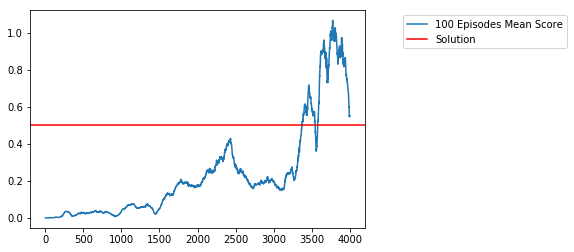

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(np.arange(0, len(max_scores)), max_scores, label = '100 Episodes Mean Score')
plt.axhline(y = 0.5, color = 'red', label = 'Solution')
plt.legend(bbox_to_anchor = (1.1, 1))
print('Maximum score: ', np.max(max_scores))

In [16]:
# test loading the weights
torch.load('actor_weights_3900.pth')

OrderedDict([('fc1.weight',
              tensor([[-0.1148, -0.0237, -0.0330,  ...,  0.0891, -0.0170,  0.0403],
                      [-0.0856,  0.0666, -0.0854,  ...,  0.1469,  0.0654, -0.0366],
                      [-0.0117,  0.0195,  0.0187,  ..., -0.2046, -0.0759,  0.0232],
                      ...,
                      [ 0.0815, -0.1103,  0.0447,  ...,  0.2000, -0.0281, -0.0928],
                      [-0.0254, -0.0356,  0.0510,  ..., -0.0101,  0.0007,  0.0503],
                      [ 0.0132,  0.0919, -0.0851,  ..., -0.1169,  0.0386,  0.0746]], device='cuda:0')),
             ('fc1.bias',
              tensor([-0.0367,  0.0925,  0.1031,  0.1016, -0.0112, -0.1004, -0.1200,
                       0.0217, -0.1361, -0.1145,  0.0805,  0.0011,  0.0508, -0.1146,
                      -0.0192,  0.0967,  0.0349,  0.0215, -0.0955, -0.1203,  0.0606,
                      -0.0678,  0.0260, -0.1202,  0.0168, -0.0987,  0.0516,  0.0218,
                      -0.0722, -0.0502, -0.0676, -0.042